In [3]:
# import packages
import numpy as np
import cv2
import matplotlib.pyplot as plt
from photutils import Background2D, MedianBackground
%matplotlib inline

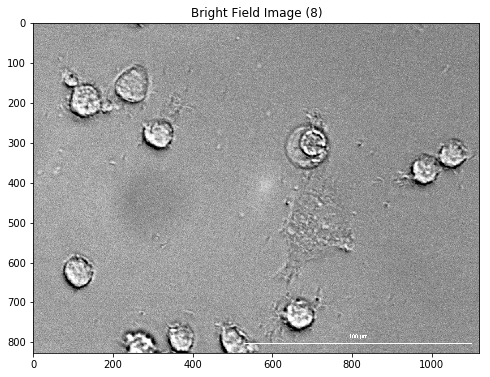

True

In [4]:
# load bright field image
im_Bright = cv2.imread("Bright_8.png", cv2.IMREAD_GRAYSCALE)
# show image
plt.figure(figsize=(8,10))
plt.imshow(im_Bright, cmap='Greys_r')
plt.title('Bright Field Image (8)')
plt.show()
cv2.imwrite('Bright_Field.jpg', im_Bright, [int(cv2.IMWRITE_JPEG_QUALITY), 600])

In [5]:
# set-up SimpleBlobDetector parameters
params = cv2.SimpleBlobDetector_Params()

# change thresholds
params.minThreshold = 50;
params.maxThreshold = 5000;

# distance between blobs
params.minDistBetweenBlobs = 60

# filter by area
params.filterByArea = True
params.minArea = 600
#params.maxArea = 5000

# filter by circularity
params.filterByCircularity = False
params.minCircularity = 0.7

# filter by convexity
params.filterByConvexity = False
#params.minConvexity = 0.87

# filter by inertia
params.filterByInertia = False
#params.minInertiaRatio = 0.8

# initialize the detector with set parameters
detector = cv2.SimpleBlobDetector_create(params)

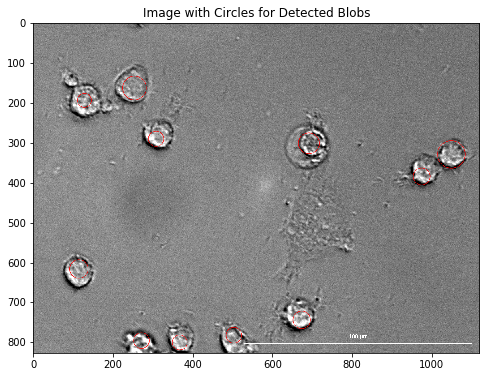

True

In [6]:
# detect blobs
keypoints = detector.detect(im_Bright)

# draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(im_Bright, keypoints, np.array([]),
                    (255,0,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# show image
plt.figure(figsize=(8,10))
plt.imshow(im_with_keypoints)
plt.title('Image with Circles for Detected Blobs')
plt.show()
cv2.imwrite('Bright_Field_Keypoints.jpg', im_with_keypoints, [int(cv2.IMWRITE_JPEG_QUALITY), 600])

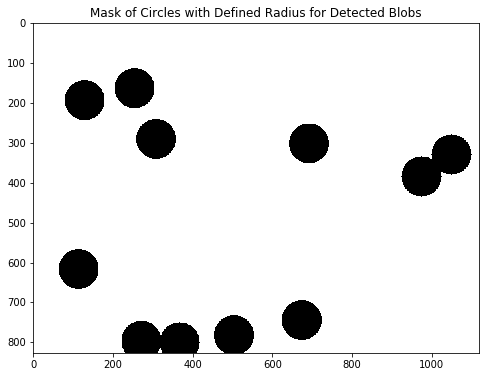

True

In [7]:
# define a mask
mask = np.ones(np.shape(im_Bright), dtype=np.uint8)

# darw a circle for the defined radius
radius = 50
for k in keypoints:
    (x,y) = k.pt
    x = int(round(x))
    y = int(round(y))
    cv2.circle(mask,(x,y),radius,0,-1)

# show image
plt.figure(figsize=(8,10))
plt.imshow(mask, cmap='Greys_r')
plt.title('Mask of Circles with Defined Radius for Detected Blobs')
plt.show()
cv2.imwrite('Mask_of_Circles.jpg', mask*255, [int(cv2.IMWRITE_JPEG_QUALITY), 600])

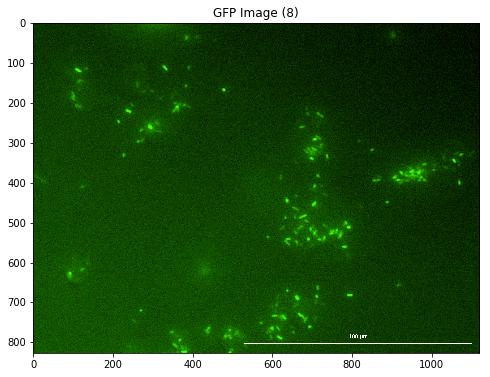

True

In [8]:
# load GFP image
im_GFP = cv2.imread("GFP_8.png")

# show image
plt.figure(figsize=(8,10))
plt.imshow(im_GFP,cmap='Greys_r')
plt.title('GFP Image (8)')
plt.show()
cv2.imwrite('GFP.jpg', im_GFP, [int(cv2.IMWRITE_JPEG_QUALITY), 600])

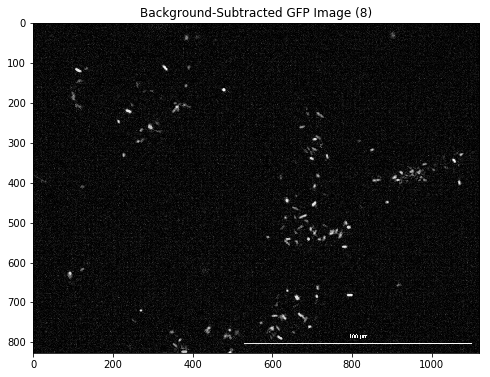

True

In [9]:
# define background estimator
# MeanBackground
# MedianBackground
# ModeEstimatorBackground
# MMMBackground
# SExtractorBackground
# BiweightLocationBackground
bkg_estimator = MedianBackground()

# estimate background (background or the background noise varies across the image)
box_size = (10, 10)
filter_size= (3, 3)
bkg = Background2D(im_GFP[: ,: , 1], box_size, filter_size=filter_size, bkg_estimator=bkg_estimator)

# background-subtracted image
bkg_GFP = im_GFP[: ,: , 1] - bkg.background

# show background-subtracted image:
plt.figure(figsize=(8,8))
plt.imshow(abs(bkg_GFP), cmap='Greys_r')
plt.title('Background-Subtracted GFP Image (8)')
plt.show()
cv2.imwrite('bkg_GFP.jpg', bkg_GFP, [int(cv2.IMWRITE_JPEG_QUALITY), 600])

In [10]:
# initialize an empty array
GFP_Intensity = []

# get GFP intensity  for each detected blobs
for k in keypoints:
    (x,y) = k.pt
    x = int(round(x))
    y = int(round(y))
    tmp = np.zeros(np.shape(im_Bright), dtype=np.uint8)
    cv2.circle(tmp,(x,y),radius,1,-1)
    GFP_Intensity = np.append(GFP_Intensity, sum(sum(np.multiply(tmp,abs(bkg_GFP)))))

In [11]:
# show results
print('Intensity of GFP Channel for Each Detected Macrophage:')
for n in range(len(keypoints)):
    (x,y) = keypoints[n].pt
    x = int(round(x))
    y = int(round(y))
    print('Macrophage', '{:2d}'.format(n), 'Center', 
          '({:4d}'.format(x),',','{:4d})'.format(y),':', '{:4d}'.format(np.int64(GFP_Intensity[n])))

Intensity of GFP Channel for Each Detected Macrophage:
Macrophage  0 Center ( 973 ,  384) : 112695
Macrophage  1 Center (1048 ,  329) : 83890
Macrophage  2 Center ( 503 ,  782) : 103514
Macrophage  3 Center ( 308 ,  290) : 95743
Macrophage  4 Center ( 673 ,  744) : 105810
Macrophage  5 Center ( 691 ,  301) : 104719
Macrophage  6 Center ( 254 ,  163) : 66599
Macrophage  7 Center ( 114 ,  616) : 81193
Macrophage  8 Center ( 129 ,  193) : 78975
Macrophage  9 Center ( 271 ,  796) : 53522
Macrophage 10 Center ( 367 ,  800) : 84597


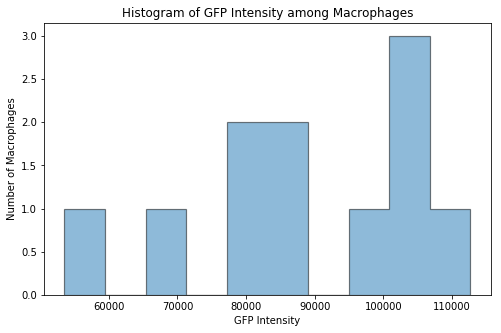

In [12]:
# show resulsts
results = np.hstack(GFP_Intensity)
plt.figure(figsize=(8,5))
plt.hist(results, bins=10 ,histtype='stepfilled', alpha=0.5, edgecolor='black', linewidth=1.2)  
plt.xlabel('GFP Intensity')
plt.ylabel('Number of Macrophages')
plt.title('Histogram of GFP Intensity among Macrophages')
plt.savefig('Histogram(Bin=10).jpg', format='jpg', dpi=600)
plt.show()

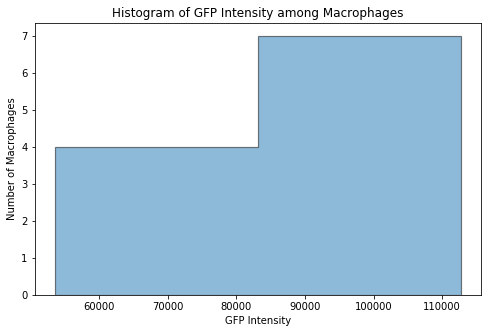

In [13]:
# show resulsts
results = np.hstack(GFP_Intensity)
plt.figure(figsize=(8,5))
plt.hist(results, bins=2 ,histtype='stepfilled', alpha=0.5, edgecolor='black', linewidth=1.2)  
plt.xlabel('GFP Intensity')
plt.ylabel('Number of Macrophages')
plt.title('Histogram of GFP Intensity among Macrophages')
plt.savefig('Histogram(Bin=2).jpg', format='jpg', dpi=600)
plt.show()

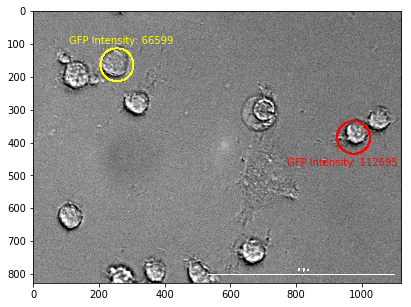

In [63]:
from PIL import Image, ImageDraw, ImageFont
# picked two macrophages
im_Original = cv2.imread("Bright_8.png")
selected = cv2.circle(im_Original,(973,384),radius,[255,0,0],5)
selected = cv2.circle(selected,(254,163),radius,[255,255,0],5)
plt.figure(figsize=(8,5))
plt.text(110,100, 'GFP Intensity: 66599', color='yellow')
plt.text(773,470, 'GFP Intensity: 112695', color='red')
plt.imshow(selected)
plt.savefig('Picked_Two.jpg', format='jpg', dpi=600)
plt.show()